In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Upload dataset
from google.colab import files
uploaded = files.upload()

#read dataset
df = pd.read_csv('strategically_balanced_depression_data.csv')

Saving strategically_balanced_depression_data.csv to strategically_balanced_depression_data.csv


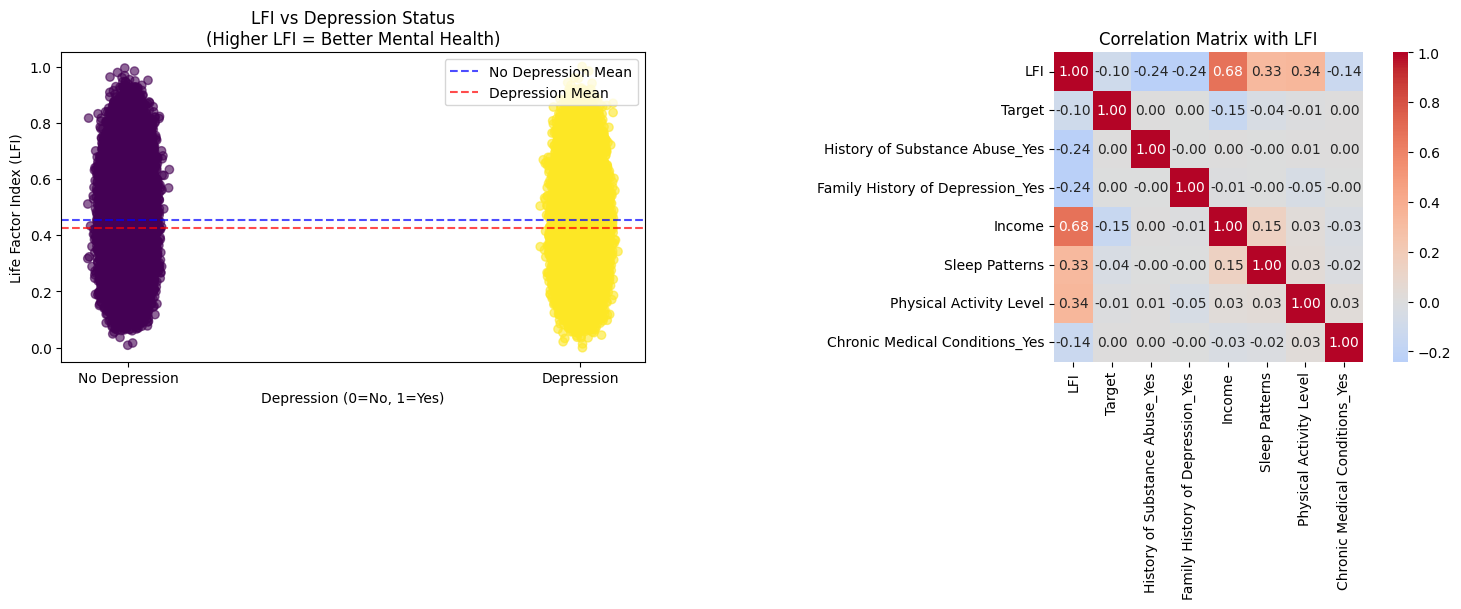

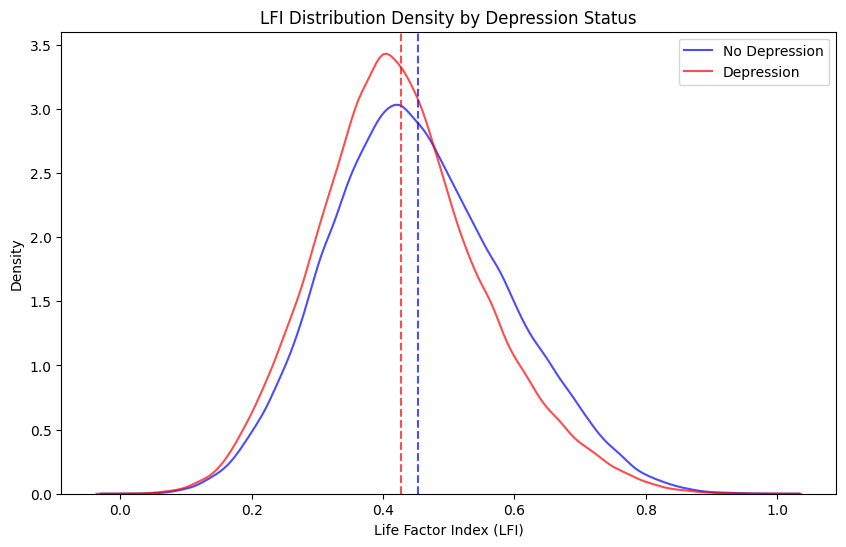

LIFE FACTOR INDEX (LFI) ANALYSIS

LFI Statistics by Depression Status:
            mean       std       min       max
Target                                        
0       0.453633  0.134741  0.008827  0.994664
1       0.426986  0.126636  0.000000  1.000000

LFI Difference: No Depression (0.454) vs Depression (0.427)
Difference: 0.027

Correlation between LFI and Depression: -0.101
(Negative correlation expected: Higher LFI → Lower depression risk)

Top 5 LFI contributors:
History of Substance Abuse_Yes: 0.180
Family History of Depression_Yes: 0.150
Income: 0.120
Sleep Patterns: 0.110
Marital Status: 0.100

Sample LFI scores:
        LFI  Target
0  0.382024       0
1  0.388857       0
2  0.424602       0
3  0.336091       1
4  0.444943       1
5  0.468411       0
6  0.562948       1
7  0.217818       0
8  0.479068       1
9  0.349596       1

LFI Range: 0.000 to 1.000
Overall LFI Mean: 0.440


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define comprehensive mental health factors 
mental_health_factors = {
    # Psychological & Behavioral factors
    'History of Substance Abuse_Yes': 0.18,      # Strong correlation with depression
    'Family History of Depression_Yes': 0.15,    # Genetic predisposition

    # Social & Economic factors
    'Income': 0.12,                             # Socioeconomic status
    'Marital Status': 0.10,                     # Social support system
    'Employment Status': 0.09,                   # Stability and purpose

    # Lifestyle & Behavioral factors
    'Sleep Patterns': 0.11,                      # Critical for mental health
    'Physical Activity Level': 0.10,             # Exercise benefits
    'Alcohol Consumption': 0.08,                 # Substance use impact
    'Dietary Habits': 0.08,                      # Nutrition impact
    'Smoking Status': 0.07,                      # Health behavior

    # Demographic & Medical factors
    'Age': 0.05,                                # Life stage risks
    'Number of Children': 0.04,                  # Family responsibilities
    'Chronic Medical Conditions_Yes': 0.09,      # Comorbidity with depression
    'Education Level': 0.06                      # Education access/resources
}

# Calculate weighted LFI
df['LFI'] = 0

for feature, weight in mental_health_factors.items():
    if '_Yes' in feature:
        df['LFI'] += (1 - df[feature]) * weight  
    else:
        df['LFI'] += df[feature] * weight

# Add important interaction terms for synergistic effects
df['LFI'] += 0.07 * (df['Sleep Patterns'] * df['Physical Activity Level']) 
df['LFI'] += 0.05 * (df['Income'] * df['Employment Status'])

# Scale only the final LFI to 0-1 range
df['LFI'] = (df['LFI'] - df['LFI'].min()) / (df['LFI'].max() - df['LFI'].min())

# EDA Visualizations 
plt.figure(figsize=(15, 6))

# Scatter plot
plt.subplot(1, 2, 1)
np.random.seed(42)
jitter = np.random.normal(0, 0.02, size=len(df))

scatter = plt.scatter(df['Target'] + jitter, df['LFI'], alpha=0.6, c=df['Target'], cmap='viridis')
plt.title('LFI vs Depression Status\n(Higher LFI = Better Mental Health)')
plt.xlabel('Depression (0=No, 1=Yes)')
plt.ylabel('Life Factor Index (LFI)')
plt.xticks([0, 1], ['No Depression', 'Depression'])

means = df.groupby('Target')['LFI'].mean()
plt.axhline(y=means[0], color='blue', linestyle='--', alpha=0.7, label='No Depression Mean')
plt.axhline(y=means[1], color='red', linestyle='--', alpha=0.7, label='Depression Mean')
plt.legend(loc='upper right') 

# Correlation heatmap with LFI
plt.subplot(1, 2, 2)
correlation_features = ['LFI', 'Target', 'History of Substance Abuse_Yes', 'Family History of Depression_Yes',
                       'Income', 'Sleep Patterns', 'Physical Activity Level', 'Chronic Medical Conditions_Yes']
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix with LFI')

plt.tight_layout()
plt.show()

# Density plot 
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Target'] == 0], x='LFI', color='blue', label='No Depression', alpha=0.7)
sns.kdeplot(data=df[df['Target'] == 1], x='LFI', color='red', label='Depression', alpha=0.7)
plt.title('LFI Distribution Density by Depression Status')
plt.xlabel('Life Factor Index (LFI)')
plt.ylabel('Density')
plt.axvline(x=means[0], color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=means[1], color='red', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')  
plt.show()

# Statistical summary

print("LIFE FACTOR INDEX (LFI) ANALYSIS")

print("\nLFI Statistics by Depression Status:")
lfi_stats = df.groupby('Target')['LFI'].agg(['mean', 'std', 'min', 'max'])
print(lfi_stats)

print(f"\nLFI Difference: No Depression ({lfi_stats.loc[0, 'mean']:.3f}) vs Depression ({lfi_stats.loc[1, 'mean']:.3f})")
print(f"Difference: {lfi_stats.loc[0, 'mean'] - lfi_stats.loc[1, 'mean']:.3f}")

print(f"\nCorrelation between LFI and Depression: {df['LFI'].corr(df['Target']):.3f}")
print("(Negative correlation expected: Higher LFI → Lower depression risk)")

print("\nTop 5 LFI contributors:")
top_contributors = sorted(mental_health_factors.items(), key=lambda x: x[1], reverse=True)[:5]
for feature, weight in top_contributors:
    print(f"{feature}: {weight:.3f}")

print("\nSample LFI scores:")
print(df[['LFI', 'Target']].head(10).to_string())

# Additional quick check LFI value ranges
print(f"\nLFI Range: {df['LFI'].min():.3f} to {df['LFI'].max():.3f}")
print(f"Overall LFI Mean: {df['LFI'].mean():.3f}")

df.to_csv('final_preprocessed_dataset.csv',index=False)
files.download('final_preprocessed_dataset.csv')